Задача — провести оценку результатов A/B-теста. В распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.

- Оценить корректность проведения теста:
    - пересечение тестовой аудитории с конкурирующим тестом,
    - совпадение теста и маркетинговых событий, другие проблемы временных границ теста.
- Проанализировать результаты теста

План работы:

- Исследовать данные:

- Провести исследовательский анализ данных

- Оценить результаты A/B-тестирования

- Описать выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования.

## Исследовать данные

### Требуется ли преобразование типов? Опиcать природу пропущенных значений и дубликатов при их наличии.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.simplefilter('ignore')

calendar = pd.read_csv('/datasets/ab_project_marketing_events.csv')
users = pd.read_csv('/datasets/final_ab_new_users.csv')
events = pd.read_csv('/datasets/final_ab_events.csv')
participants = pd.read_csv('/datasets/final_ab_participants.csv')


In [2]:
calendar

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
calendar.duplicated().sum()

0

In [5]:
users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [7]:
users.duplicated().sum()

0

In [8]:
events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [9]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


*Пустые значения в столбце details означают, что дополнительной информации о событии нет. Это относится только к авторизации пользователя*

In [10]:
events.duplicated().sum()

0

In [11]:
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [12]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


In [13]:
participants.duplicated().sum()

0

## Провести исследовательский анализ данных

### Посмотрим, совпадает ли время теста с маркетинговыми или другими активностями

In [14]:
calendar.query('finish_dt <= "2021-01-04" & start_dt >= "2020-12-07"')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


*Совпадение с одним событием в котором участвуют пользователи европейского региона, для которых проходит тестирование*

### Удостовериться, что нет пересечений с конкурирующим тестом

In [15]:
chek_test = participants.pivot_table(index='user_id', values='ab_test',aggfunc='count').reset_index()
chek_test

,user_id,ab_test
0,0002CE61FF2C4011,1
1,000ABE35EE11412F,1
2,001064FEAAB631A1,2
3,0010A1C096941592,1
4,001C05E87D336C59,1
...,...,...
16661,FFE858A7845F005E,1
16662,FFED90241D04503F,2
16663,FFEFC0E55C1CCD4F,1
16664,FFF28D02B1EACBE1,2


In [16]:
chek_test['ab_test'].value_counts()

1    15064
2     1602
Name: ab_test, dtype: int64

*1602 человека участвуют в двух тестах оновременно.*

In [17]:
pyu = chek_test.merge(participants,left_on='user_id',right_on='user_id')
pyu

,user_id,ab_test_x,group,ab_test_y
0,0002CE61FF2C4011,1,A,interface_eu_test
1,000ABE35EE11412F,1,A,recommender_system_test
2,001064FEAAB631A1,2,B,recommender_system_test
3,001064FEAAB631A1,2,B,interface_eu_test
4,0010A1C096941592,1,A,recommender_system_test
...,...,...,...,...
18263,FFED90241D04503F,2,B,interface_eu_test
18264,FFEFC0E55C1CCD4F,1,B,interface_eu_test
18265,FFF28D02B1EACBE1,2,B,recommender_system_test
18266,FFF28D02B1EACBE1,2,A,interface_eu_test


In [18]:
def test_count(row):
    ab_test_x = row['ab_test_x']
    if ab_test_x ==1:
        return 'one'
    if ab_test_x ==2:
        return 'two'
    return 'three'
pyu['test_count'] = pyu.apply(test_count,axis=1)
pyu

,user_id,ab_test_x,group,ab_test_y,test_count
0,0002CE61FF2C4011,1,A,interface_eu_test,one
1,000ABE35EE11412F,1,A,recommender_system_test,one
2,001064FEAAB631A1,2,B,recommender_system_test,two
3,001064FEAAB631A1,2,B,interface_eu_test,two
4,0010A1C096941592,1,A,recommender_system_test,one
...,...,...,...,...,...
18263,FFED90241D04503F,2,B,interface_eu_test,two
18264,FFEFC0E55C1CCD4F,1,B,interface_eu_test,one
18265,FFF28D02B1EACBE1,2,B,recommender_system_test,two
18266,FFF28D02B1EACBE1,2,A,interface_eu_test,two


In [19]:
xlm = pyu.query('ab_test_y == "recommender_system_test"')
xlm

,user_id,ab_test_x,group,ab_test_y,test_count
1,000ABE35EE11412F,1,A,recommender_system_test,one
2,001064FEAAB631A1,2,B,recommender_system_test,two
4,0010A1C096941592,1,A,recommender_system_test,one
5,001C05E87D336C59,1,A,recommender_system_test,one
11,00341D8401F0F665,2,A,recommender_system_test,two
...,...,...,...,...,...
18249,FFC2C5F898D1245B,1,B,recommender_system_test,one
18251,FFC53FD45DDA5EE8,2,B,recommender_system_test,two
18261,FFE858A7845F005E,1,A,recommender_system_test,one
18262,FFED90241D04503F,2,B,recommender_system_test,two


In [20]:
xlm.pivot_table(index=['group','test_count','ab_test_y'], values='user_id',aggfunc='count').reset_index()

,group,test_count,ab_test_y,user_id
0,A,one,recommender_system_test,2903
1,A,two,recommender_system_test,921
2,B,one,recommender_system_test,2196
3,B,two,recommender_system_test,681


*В группе А просматриваемого теста 921 человек задействован в конкурирующем тесте, в группе В 681 человек. Удалить мы их не можем, так как выборка и так небольшая. Это безусловно будет отрицательно влиять на результат теста, так как проведение двух тестов сразу приведет к ошибке расчета конверсии, увеличение p-value и процента отдать победу не той группе.*

### Как пользователи распределены в выборках


In [21]:
# выведем пользователей необходимого теста
rec_sys_test = participants.query('ab_test == "recommender_system_test"')
rec_sys_test

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test
6697,9D263B8EF15CF188,B,recommender_system_test
6698,F2FBBA33F37DEC46,A,recommender_system_test
6699,29C92313A98B1176,B,recommender_system_test


In [22]:
rec_sys_test.groupby('group').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False).reset_index()

,group,user_id
0,A,3824
1,B,2877


*Смещение в сторону выборки А, она состовляет 57% от общего числа пользователей. Выборка не совсем равна. Делаю вывод, что при проведении теста были пожертвованы некоторые показатели*

### Узнать, встречаются ли в выборках одни и те же пользователи

In [23]:
# проверим в скольких группах есть пользователи. 1 - одна группа, 2 - две группы
chek_group = rec_sys_test.pivot_table(index='user_id', values='ab_test',aggfunc='count').reset_index()
chek_group

,user_id,ab_test
0,000ABE35EE11412F,1
1,001064FEAAB631A1,1
2,0010A1C096941592,1
3,001C05E87D336C59,1
4,00341D8401F0F665,1
...,...,...
6696,FFC2C5F898D1245B,1
6697,FFC53FD45DDA5EE8,1
6698,FFE858A7845F005E,1
6699,FFED90241D04503F,1


In [24]:
# посмотрим количество человек в каждой группе
chek_group['ab_test'].value_counts()

1    6701
Name: ab_test, dtype: int64

*Все пользователи в разных выборках, несмотря на то, что есть пользователи в двух разных тестах*

### Узнать как число событий распределено по дням

In [25]:
events['event_dt'] = pd.to_datetime(events['event_dt'])
events['day'] = events['event_dt'].dt.day
events

,user_id,event_dt,event_name,details,day
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,7
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,7
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,7
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,7
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,7
...,...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,30
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,30
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,30
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,30


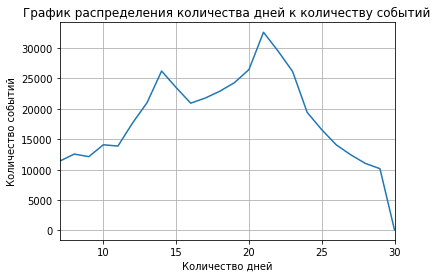

In [26]:
events.groupby('day')['event_name'].count().reset_index().sort_values(by='day')
events.groupby('day')['event_name'].count().plot()
plt.xlabel('Количество дней')
plt.ylabel('Количество событий')
plt.title('График распределения количества дней к количеству событий')
plt.grid(True)
plt.show()


*Планомерно увеличивается количество событий до пика - 21 декабря, после чего, по мере приближения нового года, количество событий(заходов в магазин) падают. Предпраздничные дни дают о себе знать.*

###  Количество событий на пользователя одинаково распределены в выборках?

In [27]:
test_events = rec_sys_test.merge(events,left_on='user_id',right_on='user_id')
test_events

,user_id,group,ab_test,event_dt,event_name,details,day
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,7
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:56,purchase,4.99,25
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,7
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:57,product_cart,NaN,25
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,7
...,...,...,...,...,...,...,...
24693,6715343AFBA285AE,B,recommender_system_test,2020-12-07 10:12:15,login,NaN,7
24694,6715343AFBA285AE,B,recommender_system_test,2020-12-08 22:51:16,login,NaN,8
24695,6715343AFBA285AE,B,recommender_system_test,2020-12-09 02:28:03,login,NaN,9
24696,6715343AFBA285AE,B,recommender_system_test,2020-12-10 22:55:14,login,NaN,10


In [28]:
test_events.duplicated().sum()

0

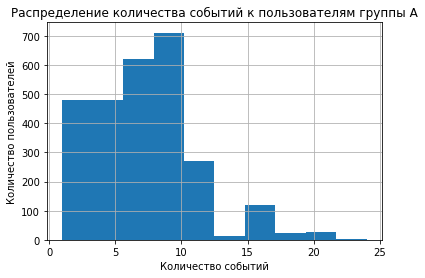

In [29]:
fig, ax = plt.subplots()
test_events.query('group=="A"').groupby('user_id')['event_name'].count().hist()
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Распределение количества событий к пользователям группы А')
plt.show()

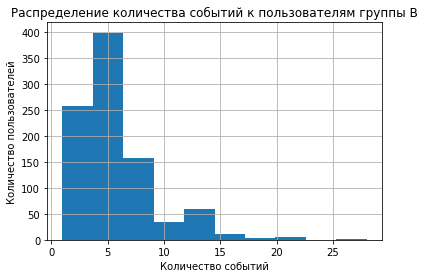

In [30]:
fig, ax = plt.subplots()
test_events.query('group=="B"').groupby('user_id')['event_name'].count().hist()
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.title('Распределение количества событий к пользователям группы B')
plt.show()

*В группе А количество событий на пользователя гораздо больше, что также внесет отрицательно действие на решение теста и расчет конверсии*

### Узнать как меняется конверсия в воронке на разных этапах

In [31]:
# отфильтруем пользователей с европейским регионом и до даты остановки набора новых пользователей
users_sort = users.query('region == "EU" & first_date <="2020-12-21"')
users_sort

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
9,FFCEA1179C253104,2020-12-07,EU,Android
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [32]:
# oтфильтруем события, которые превышают двух недельный срок с момента регистрации пользователей
event_user = events.merge(users_sort, left_on='user_id', right_on='user_id')
event_user['event_date'] = event_user['event_dt'].dt.date
event_user['event_date'] = pd.to_datetime(event_user['event_date'])
event_user['first_date'] = pd.to_datetime(event_user['first_date'])
event_user['cnt_days'] = event_user['event_date'] - event_user['first_date']
event_user = event_user.query('cnt_days <="14 days"')
event_user

,user_id,event_dt,event_name,details,day,first_date,region,device,event_date,cnt_days
0,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,7,2020-12-07,EU,iPhone,2020-12-07,0 days
1,7B6452F081F49504,2020-12-09 01:50:37,purchase,4.99,9,2020-12-07,EU,iPhone,2020-12-09,2 days
2,7B6452F081F49504,2020-12-21 08:04:05,purchase,4.99,21,2020-12-07,EU,iPhone,2020-12-21,14 days
4,7B6452F081F49504,2020-12-07 09:22:55,product_page,NaN,7,2020-12-07,EU,iPhone,2020-12-07,0 days
5,7B6452F081F49504,2020-12-09 01:50:38,product_page,NaN,9,2020-12-07,EU,iPhone,2020-12-09,2 days
...,...,...,...,...,...,...,...,...,...,...
302646,FE2F3BFF12E5AB13,2020-12-21 09:42:43,login,NaN,21,2020-12-21,EU,Mac,2020-12-21,0 days
302647,FE2F3BFF12E5AB13,2020-12-23 10:19:10,login,NaN,23,2020-12-21,EU,Mac,2020-12-23,2 days
302648,FE2F3BFF12E5AB13,2020-12-24 09:28:54,login,NaN,24,2020-12-21,EU,Mac,2020-12-24,3 days
302649,7836B9BF6BC33911,2020-12-21 19:49:46,login,NaN,21,2020-12-21,EU,Android,2020-12-21,0 days


In [33]:
# создадим датафрейм с покупателями 
data = rec_sys_test.merge(event_user, left_on='user_id', right_on='user_id')
data

,user_id,group,ab_test,event_dt,event_name,details,day,first_date,region,device,event_date,cnt_days
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,7,2020-12-07,EU,PC,2020-12-07,0 days
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,7,2020-12-07,EU,PC,2020-12-07,0 days
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,7,2020-12-07,EU,PC,2020-12-07,0 days
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,NaN,7,2020-12-07,EU,PC,2020-12-07,0 days
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,NaN,20,2020-12-20,EU,iPhone,2020-12-20,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
22823,80712ED4EA1B52A5,A,recommender_system_test,2020-12-15 20:10:06,product_page,NaN,15,2020-12-14,EU,Android,2020-12-15,1 days
22824,80712ED4EA1B52A5,A,recommender_system_test,2020-12-20 20:01:34,product_page,NaN,20,2020-12-14,EU,Android,2020-12-20,6 days
22825,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14 05:48:50,login,NaN,14,2020-12-14,EU,Android,2020-12-14,0 days
22826,80712ED4EA1B52A5,A,recommender_system_test,2020-12-15 20:10:03,login,NaN,15,2020-12-14,EU,Android,2020-12-15,1 days


In [35]:
# создадим сводную таблицу и найдем конверсию
funnel = data.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
funnel

,user_id
event_name,
login,3480
product_page,2178
purchase,1082
product_cart,1026


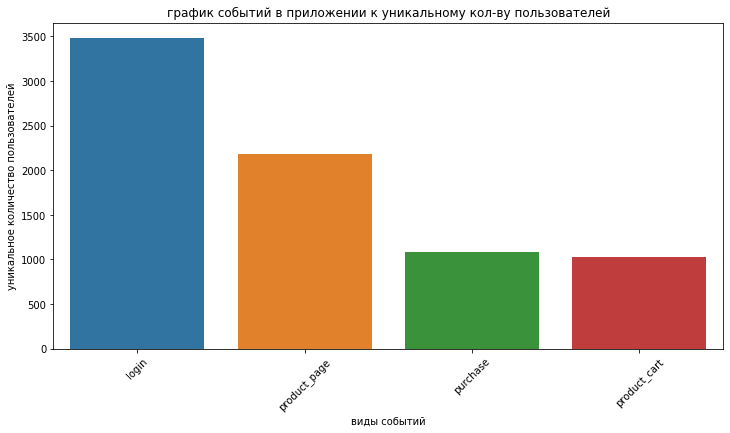

In [36]:
import seaborn as sns

proportion = data.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by = 'user_id', ascending=False)
plot_order = data.sort_values(by='event_name', ascending=False).user_id.values
plt.figure(figsize=(12, 6))
g = sns.barplot(x='event_name', y='user_id', data=proportion);
g.set(xlabel="виды событий", ylabel="уникальное количество пользователей");
title = ('график событий в приложении к уникальному кол-ву пользователей')
g.set(title=title);
plt.xticks(rotation=45);

*По итогу воронки:*

*3480 залогинилось*

*2178 просмотрели карточки товаров*

*1082 купили*

*1026 перешли в корзину*

*56 человек совершили покупку не переходя в корзину, скоее всего это один товар*

*Резкий отпад пользователей происходит в моменте добавления товаров корзину. Только 6%, изучив карточки с товарами, добавляют их в корзину, а из них только один процент этот товар покупает. Необходимо узнать в чем причина, возможно, дело не в продукте, а в интерфейсе или каких-то других технических составляющих*

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

*Во-первых, как долго проходит тест. В наше случае это месяц. Минусом являеться выбор даты, так как окончание теста попадает на предпраздничные дни и конверсия падает.*

*Во-вторы, характерна ли для него проблема подглядывания, когда в начале теста поступление новых данных значительно искажает общий результат.*

*В третьих, равномерное распределение пользователей в группах. В нашем случае, контрольная превышает на 7%*

## Оценить результаты A/B-тестирования

### Проверить статистическую разницу долей z-критерием

*Посчитаем какое количество пользователей в каждой группе совершили то или иное событие*

In [37]:
A_group = data.query('group == "A"').groupby('event_name').agg({'user_id': 'nunique'}).reset_index()
A_group

,event_name,user_id
0,login,2604
1,product_cart,782
2,product_page,1685
3,purchase,833


In [38]:
B_group = data.query('group == "B"').groupby('event_name').agg({'user_id': 'nunique'}).reset_index()
B_group

,event_name,user_id
0,login,876
1,product_cart,244
2,product_page,493
3,purchase,249


In [39]:
A_group = A_group.set_index('event_name')
B_group = B_group.set_index('event_name')

Н_0: Доля группы A = Доля группы B

Н_1: Доля группы A != Доля группы B

In [40]:
for event_name in A_group.index.to_list():
    print(event_name)
    count = (A_group.loc[event_name, 'user_id'], B_group.loc[event_name, 'user_id'])
    nobs = (data.query('group == "A"')['user_id'].nunique(), data.query('group == "B"')['user_id'].nunique())
    stat, pval = proportions_ztest(count, nobs)
    print(float(pval))
    if pval < 0.05:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

login
0.08481837035887359
Не получилось отвергнуть нулевую гипотезу
product_cart
0.21469192029582396
Не получилось отвергнуть нулевую гипотезу
product_page
6.94273935952599e-06
Отвергаем нулевую гипотезу
purchase
0.04652482738393029
Отвергаем нулевую гипотезу


### Что можно сказать про результаты A/В-тестирования?

*По итогу z-теста, доли имеют статистическую разницу в каждом событии, а это значит, что мы не можем быть уверены в точности проведенного тестирования. Также пользователи распределились между группами неравномерно. Во время проведения теста данные могли быть искажены конкурирующим тестом или маркетинговой активностью в канун рождества.*

## Описать выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования

*Есть небольшое различие в выборке пользователей для теста, но это не существенно. Количество событий в группе А распределенно больше, чем в группе В. Не были захвачены в разные группы теста одни и те же пользователи, но в разные тесты были отобраны 1602 человек(в группе А просматриваемого теста 921 человек задействован в конкурирующем тесте, в группе В 681 человек), также тест проводился в одно и то же время с маркетинговым событием в предпраздничные дни.*